<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Starter_CNNpred_Stock_Market_c21209c7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [114]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [116]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [117]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Processed_DJI.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/Bencode/AnalyzeStocks/dataset/Processed_RUSSELL.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Processed_DJI.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 84 columns


In [118]:
df1.head(5)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,DJI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,RUT,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,640.099976,0.921723,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.014951,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,RUT,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,638.489990,-0.375903,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,-0.001128,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,RUT,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,637.950012,0.996234,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000157,...,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,RUT,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,641.969971,0.059932,0.006301,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.003138,...,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,RUT,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


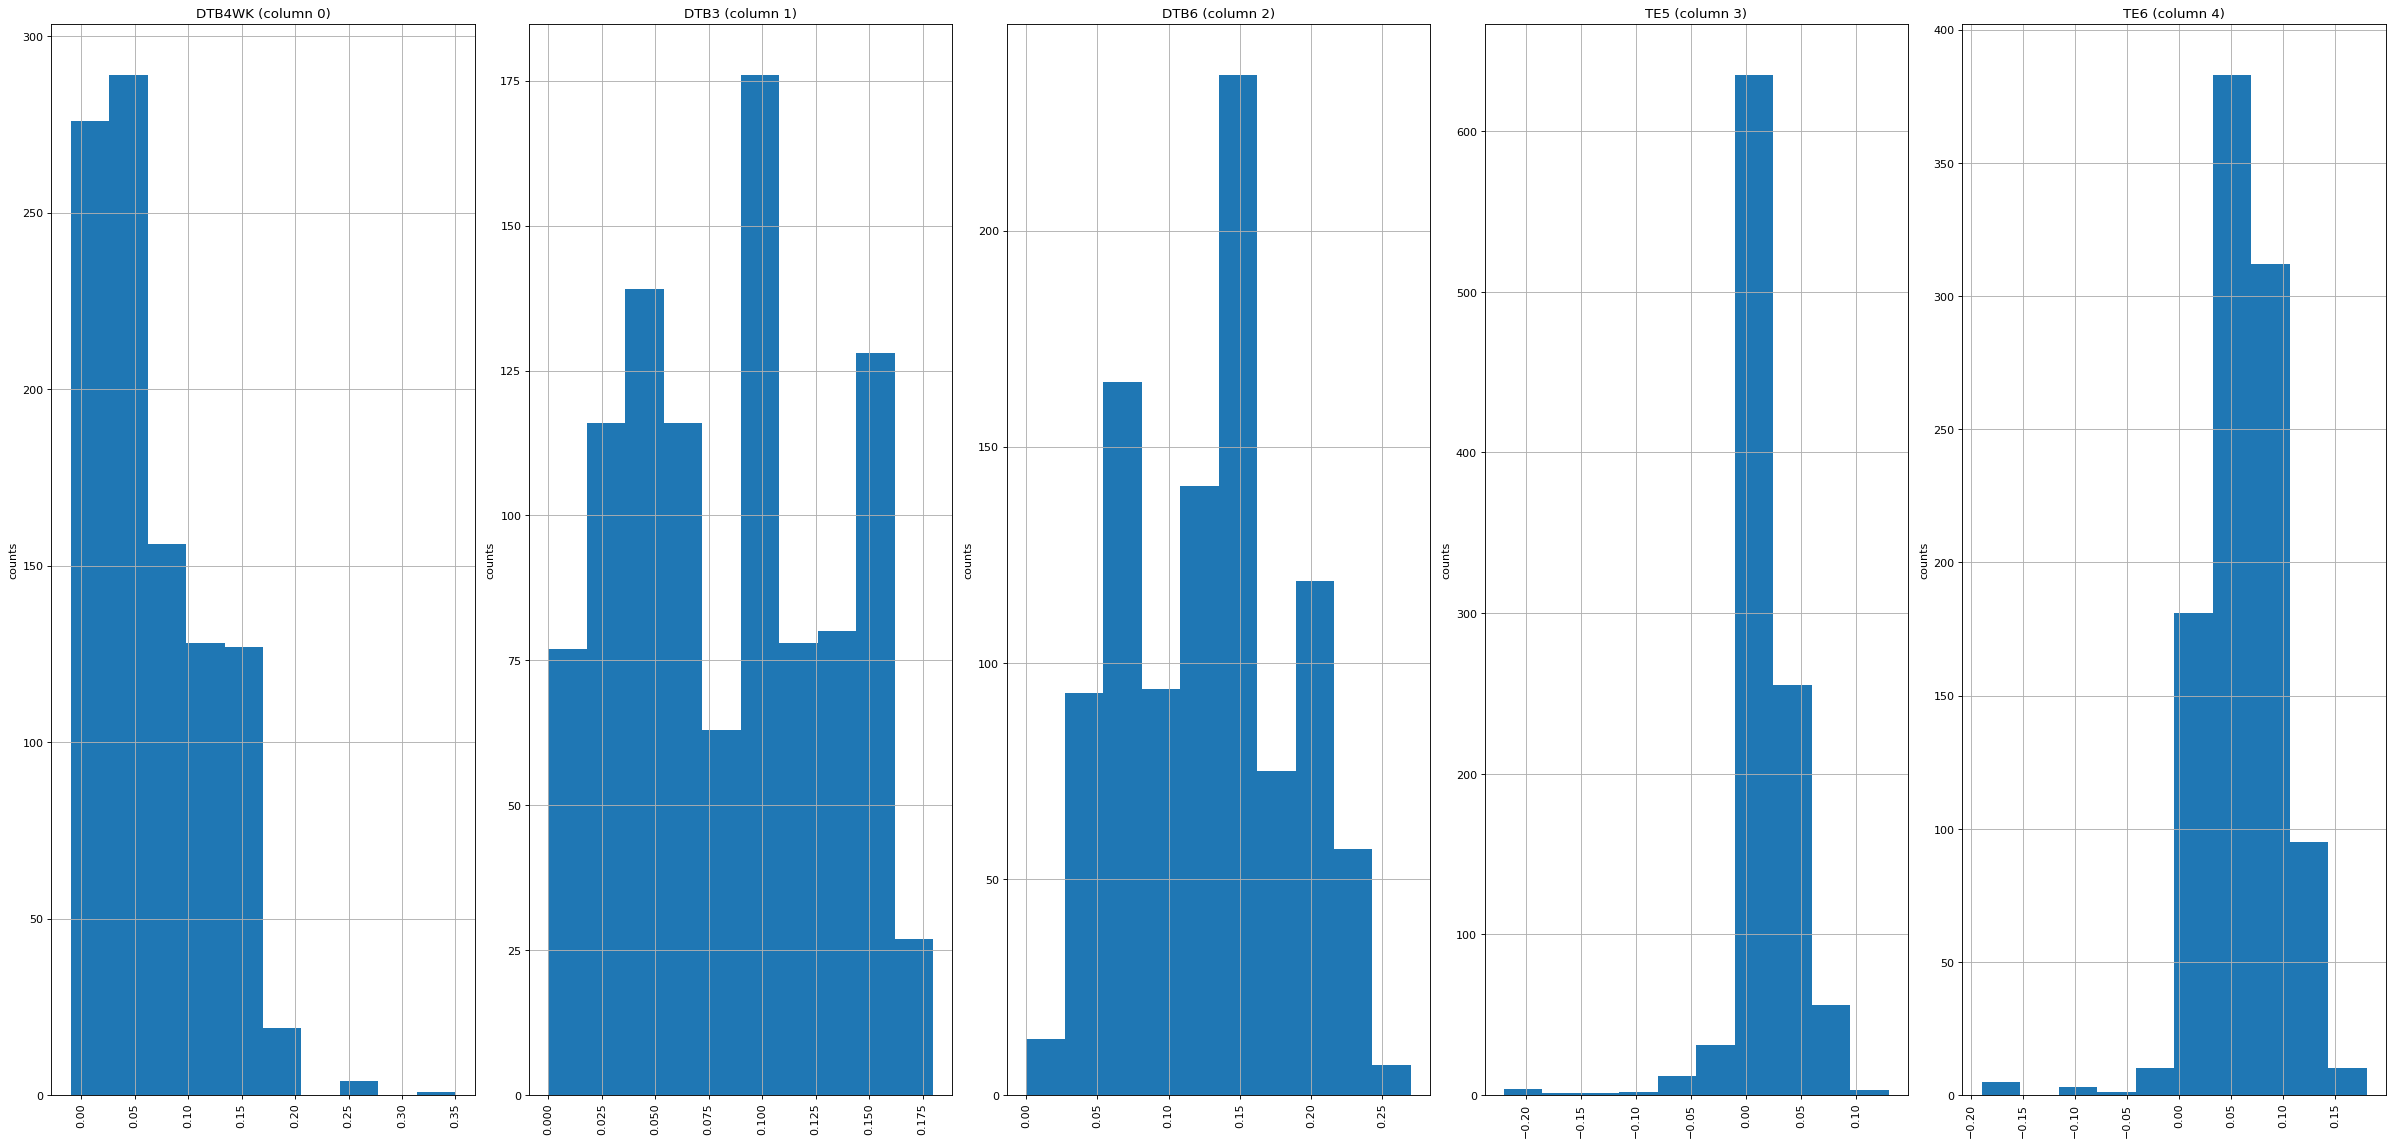

In [119]:
plotPerColumnDistribution(df1, 10, 5)

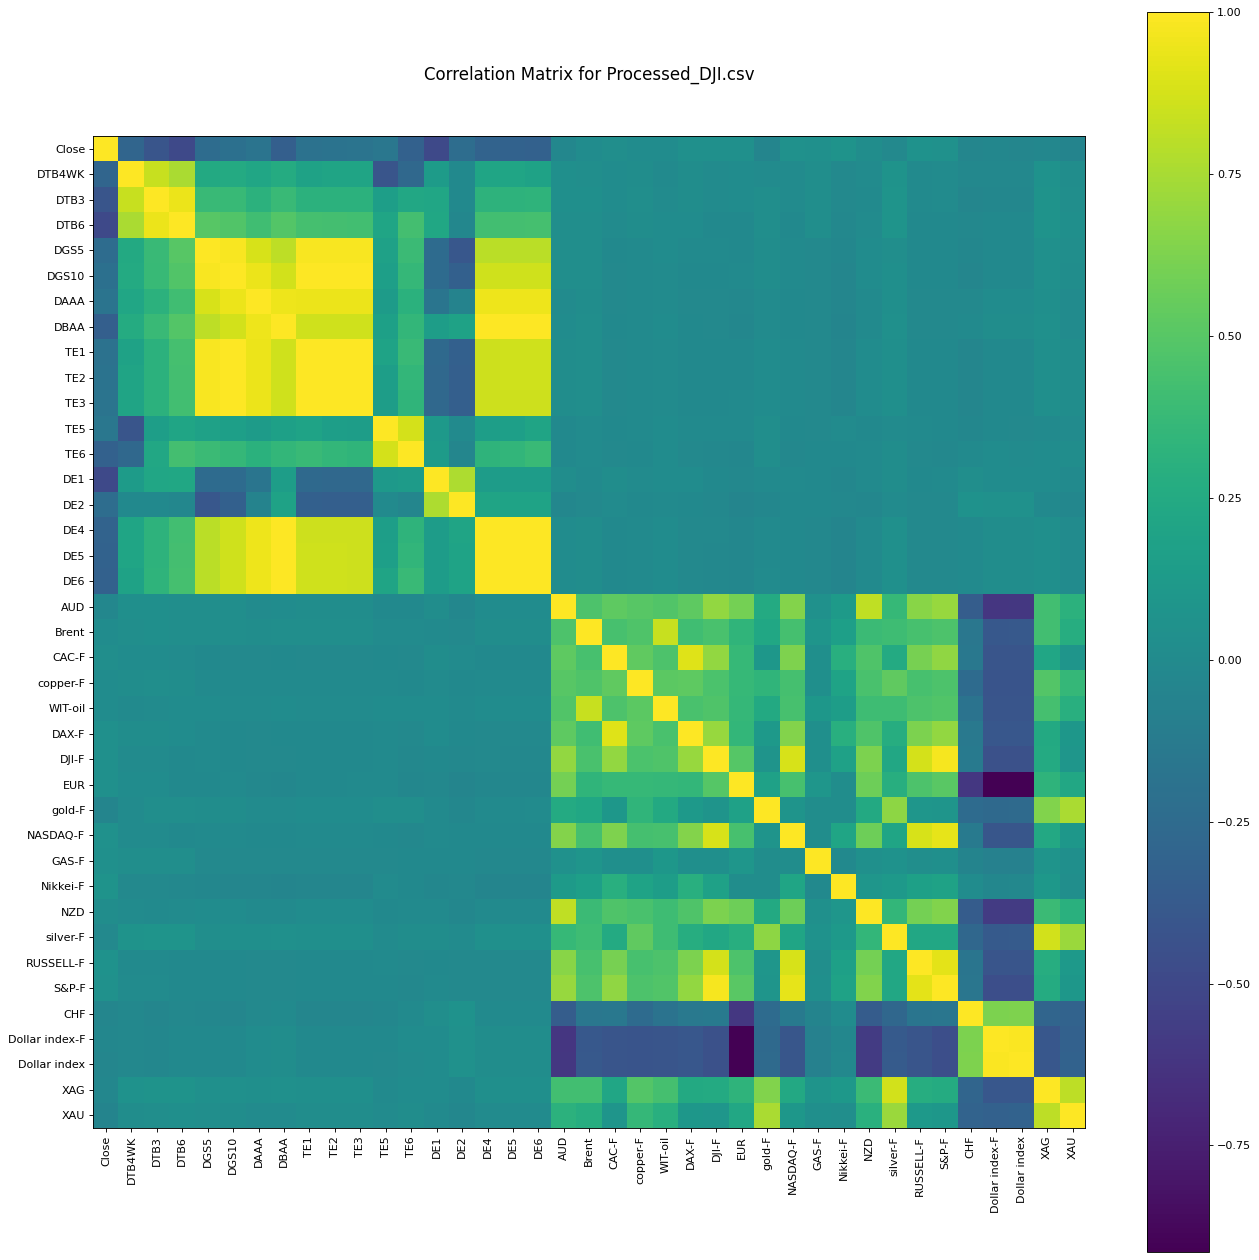

In [120]:
plotCorrelationMatrix(df1, 20)

In [124]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Processed_NASDAQ.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/drive/MyDrive/Bencode/AnalyzeStocks/dataset/Processed_NASDAQ.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Processed_NASDAQ.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 84 columns


In [125]:
df2.head(5)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NASDAQ,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NASDAQ,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NASDAQ,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,...,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,NASDAQ,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,...,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,NASDAQ,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


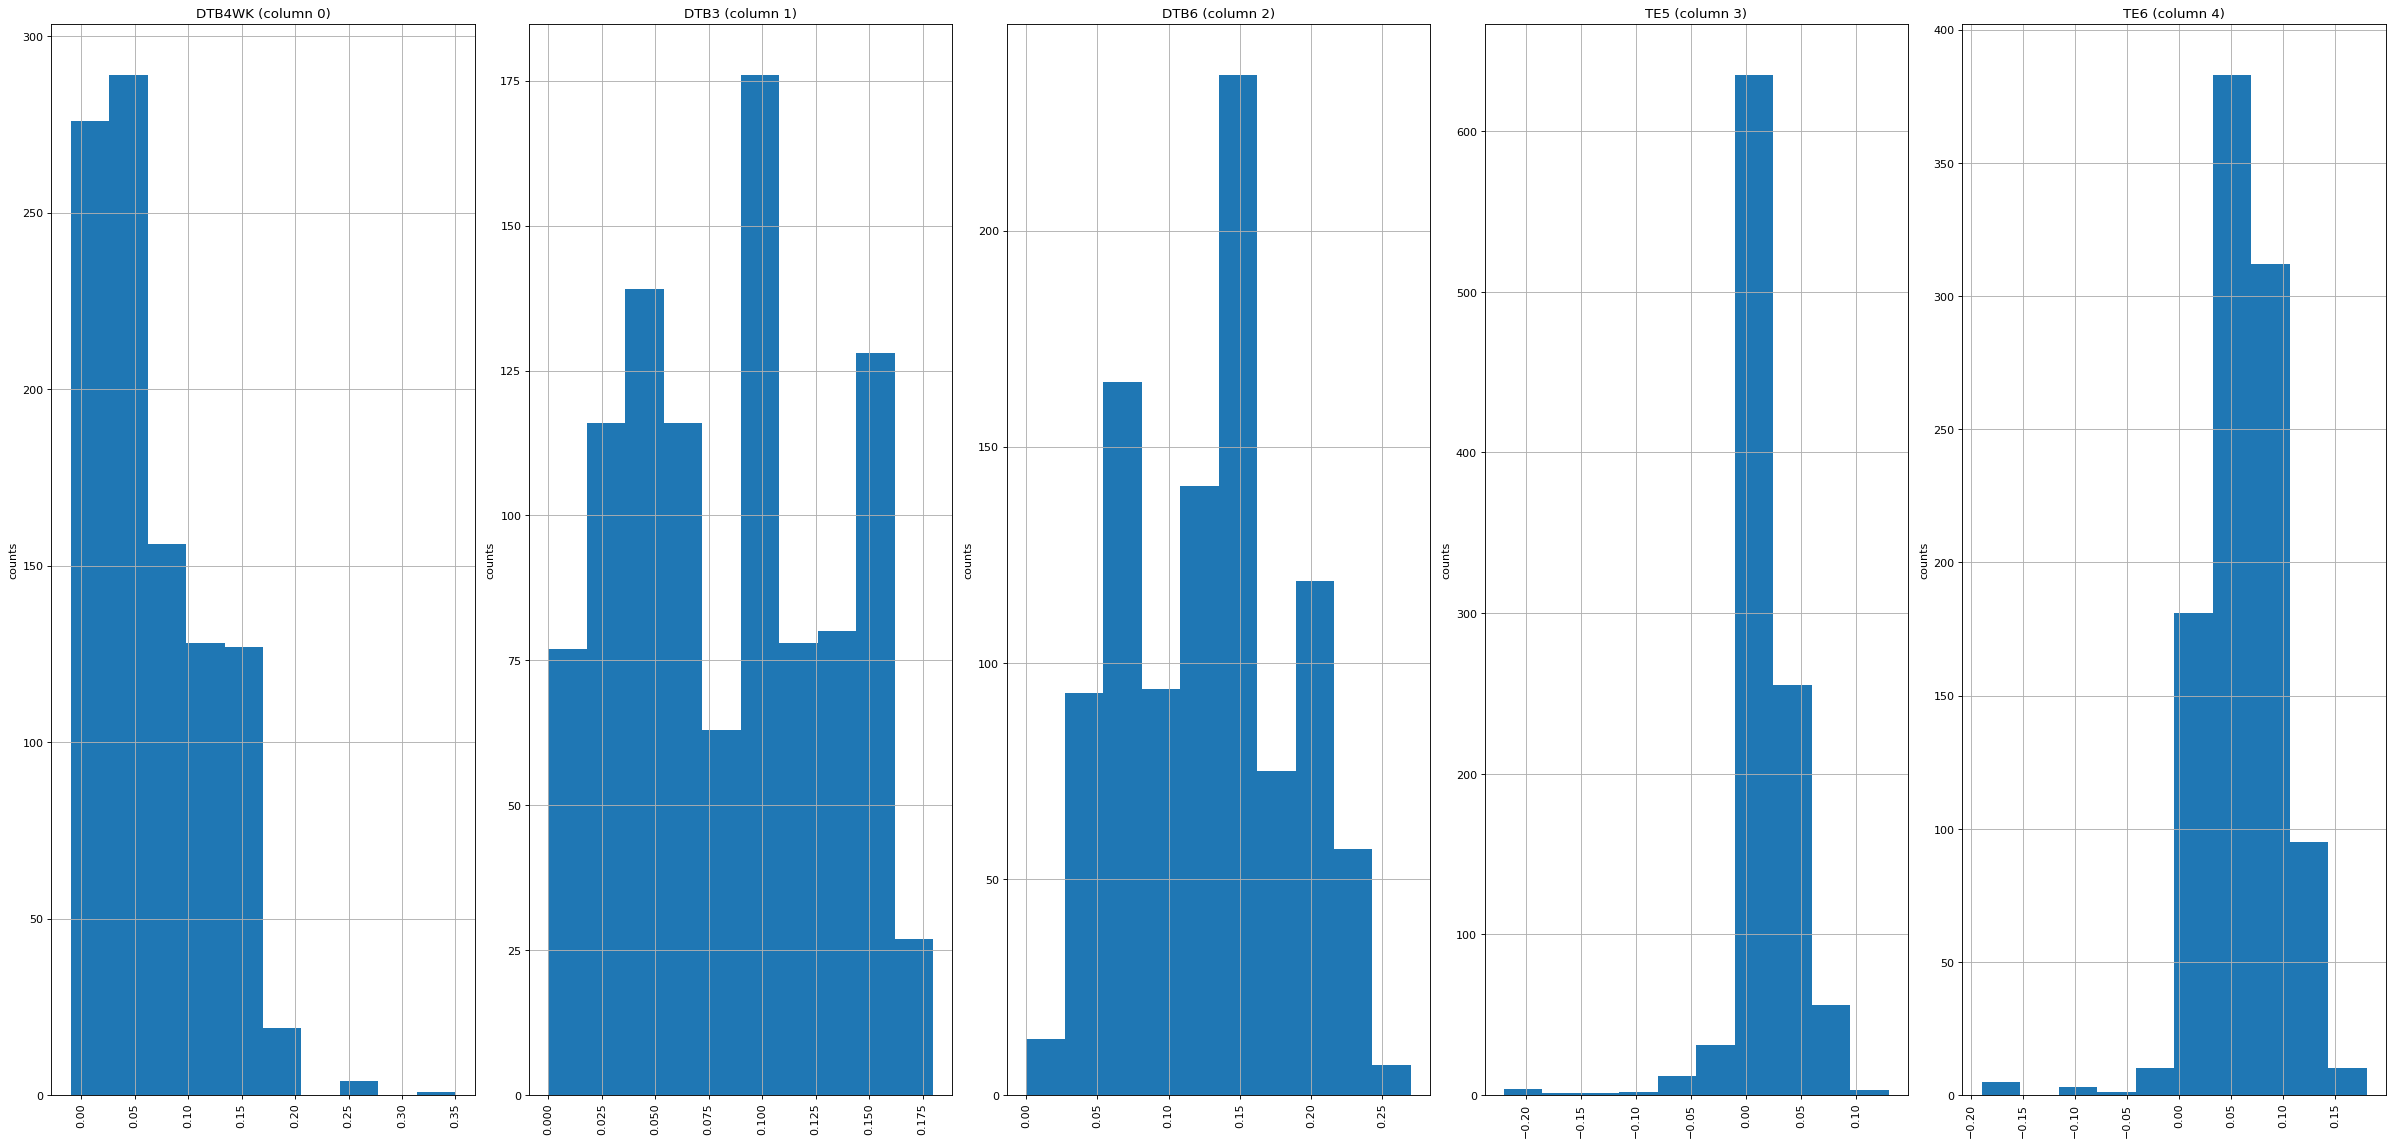

In [126]:
plotPerColumnDistribution(df2, 10, 5)

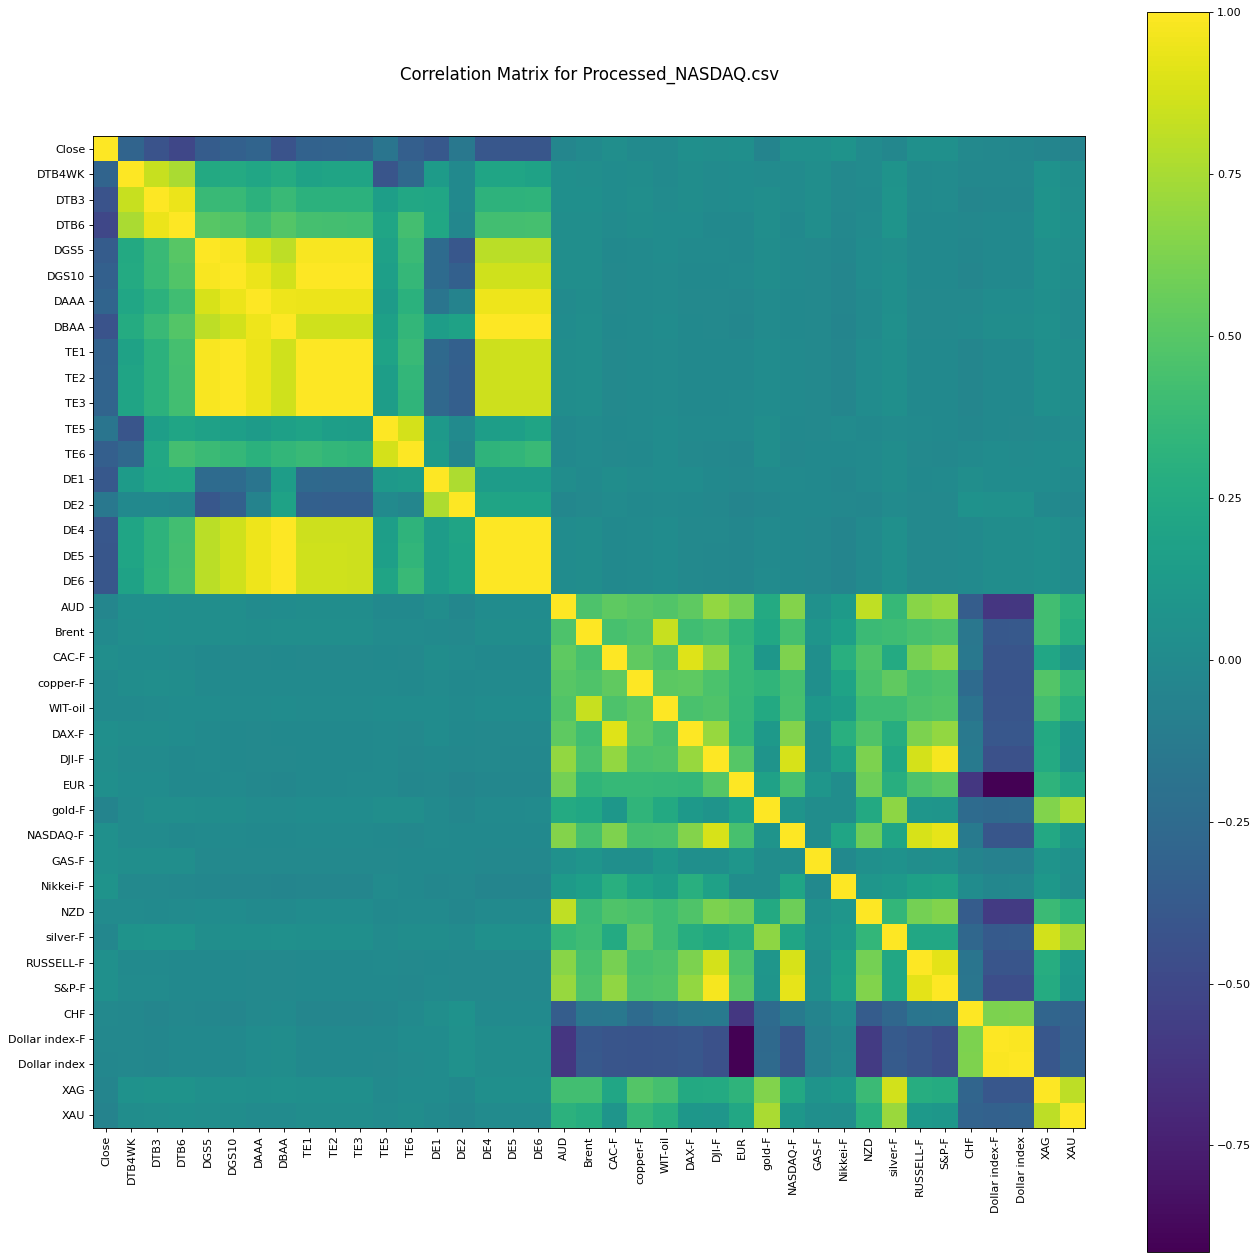

In [127]:
plotCorrelationMatrix(df2, 20)

In [129]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Processed_NYSE.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/drive/MyDrive/Bencode/AnalyzeStocks/dataset/Processed_NYSE.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Processed_NYSE.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 84 columns


In [130]:
df3.head(5)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,DJI,...,RUT,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,7184.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NYA,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,7326.740234,0.921723,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.014951,...,0.023521,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NYA,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,7354.870117,-0.375903,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,-0.001128,...,-0.002515,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NYA,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,7377.700195,0.996234,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000157,...,-0.000846,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,NYA,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.003138,...,0.006301,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,NYA,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


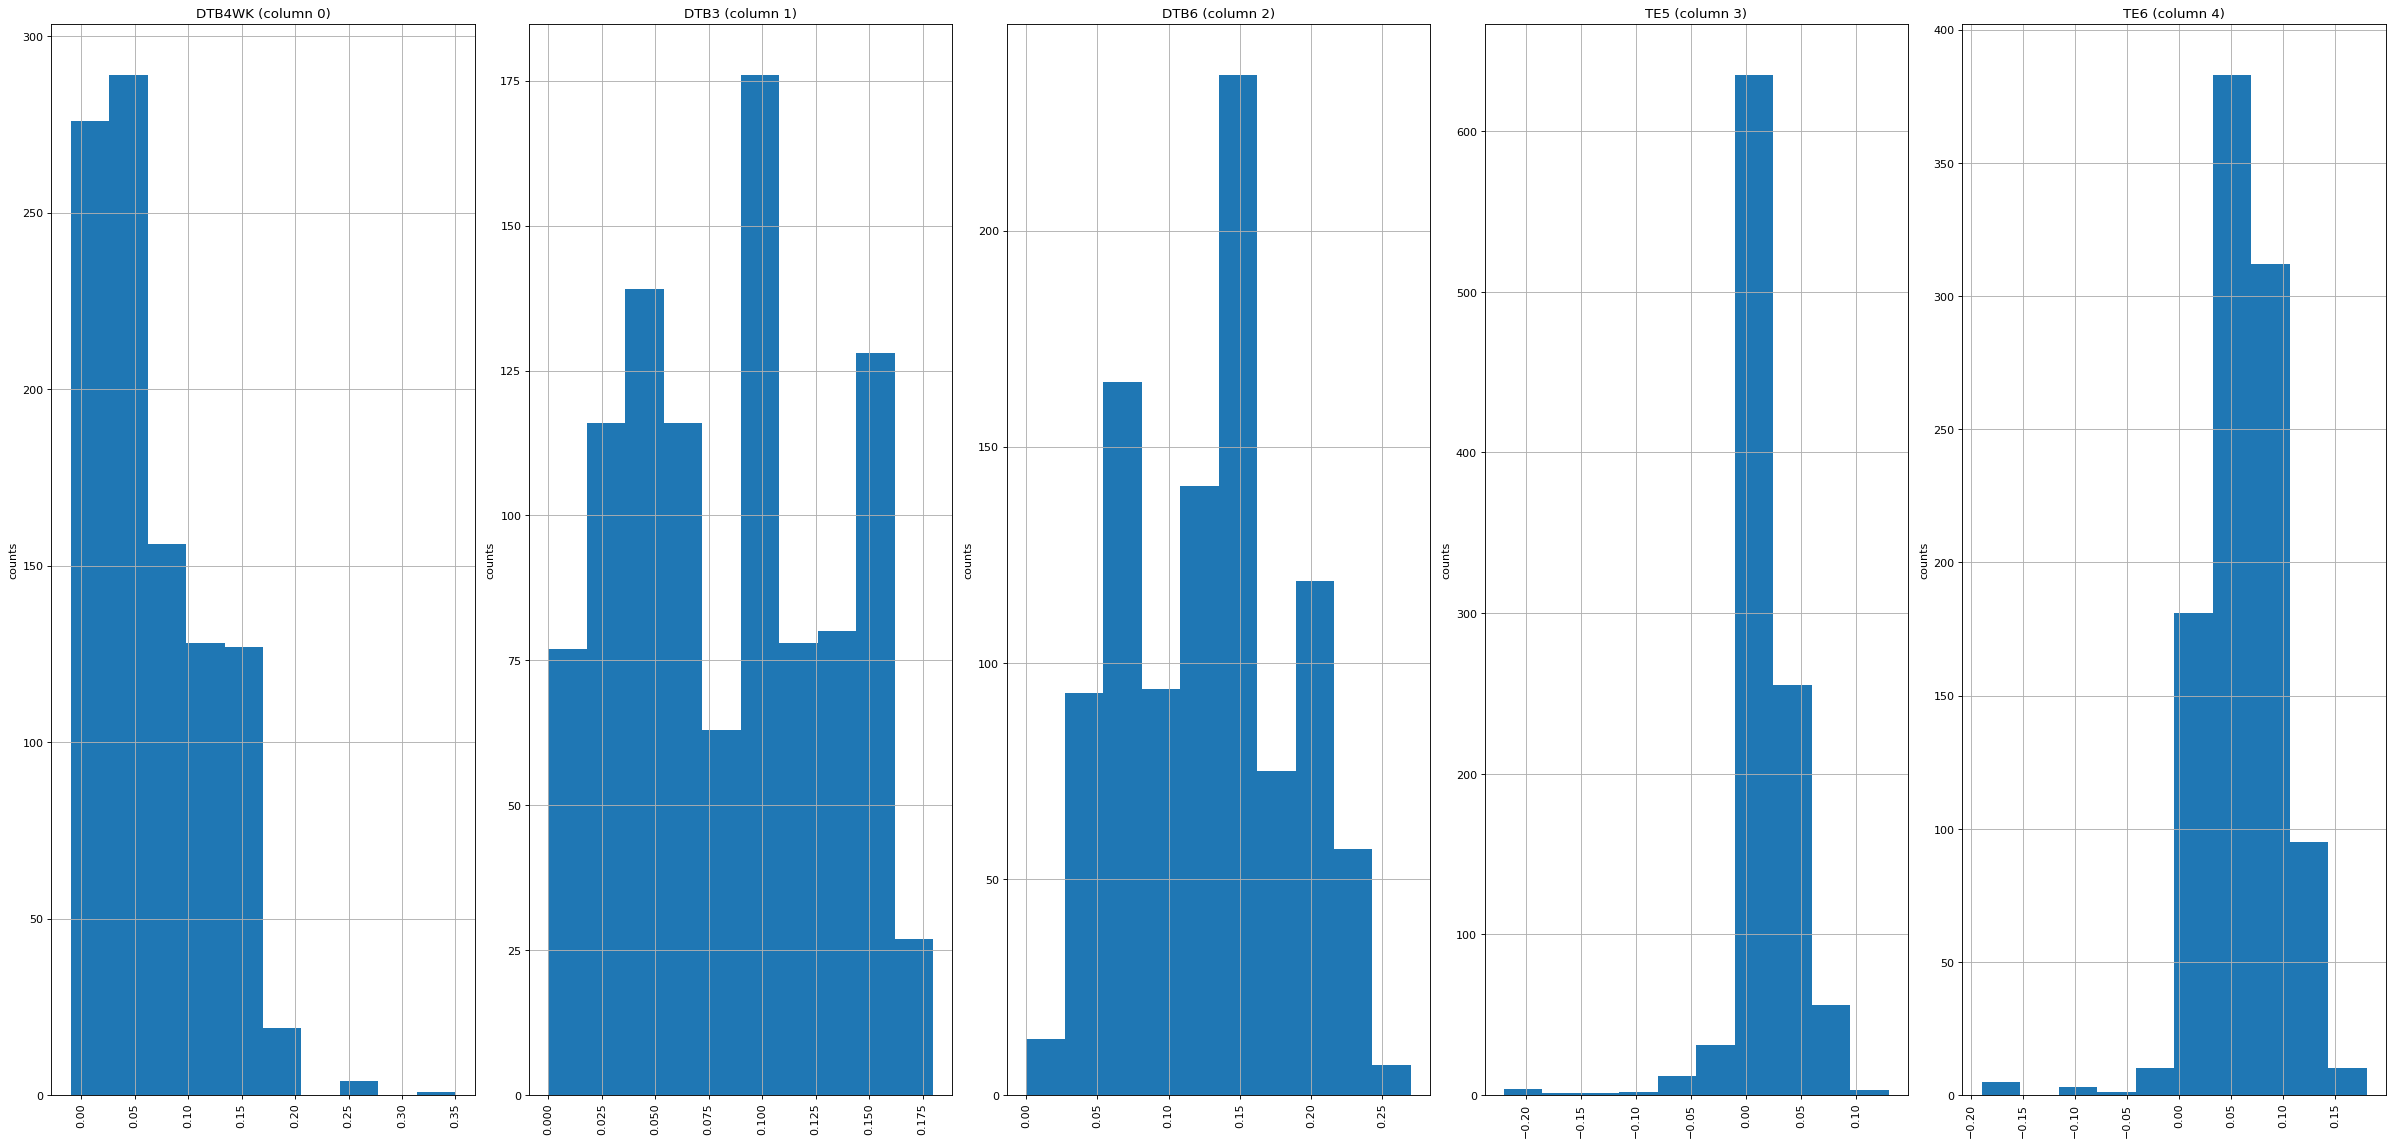

In [131]:
plotPerColumnDistribution(df3, 10, 5)

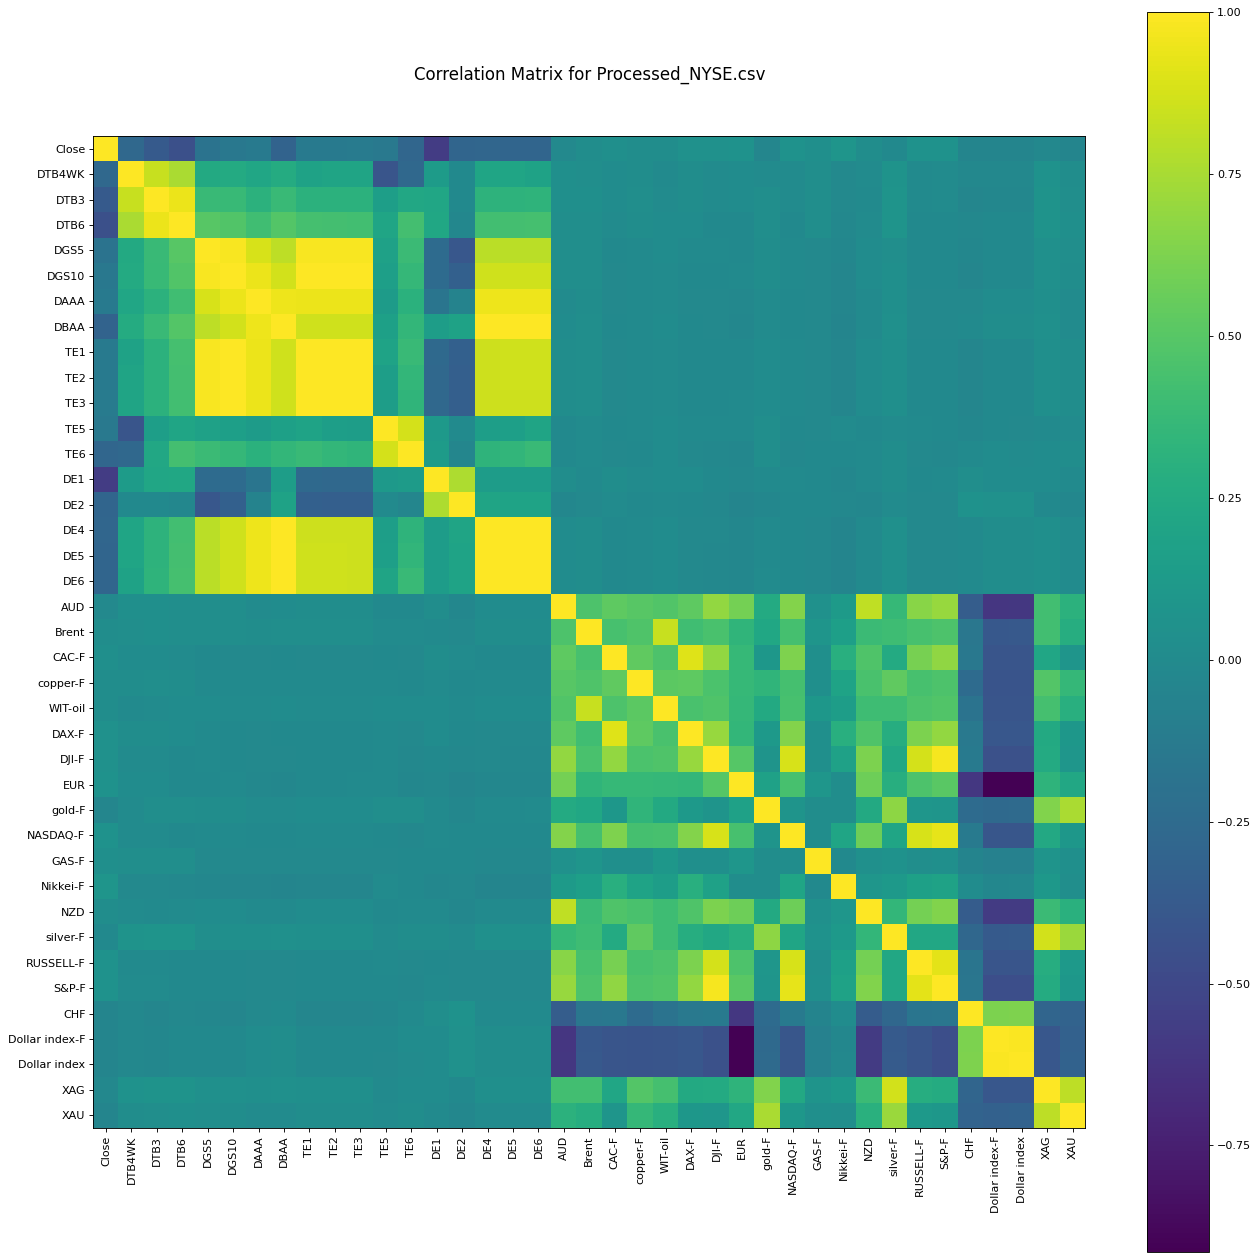

In [132]:
plotCorrelationMatrix(df3, 20)